In [ ]:
# 1. Business Understanding
# Tujuan kita adalah mengklasifikasikan jenis bunga iris berdasarkan fitur ukurannya.

# 2. Data Understanding
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


# Load dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target

data['target'] = data['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Menampilkan 5 data pertama
data.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


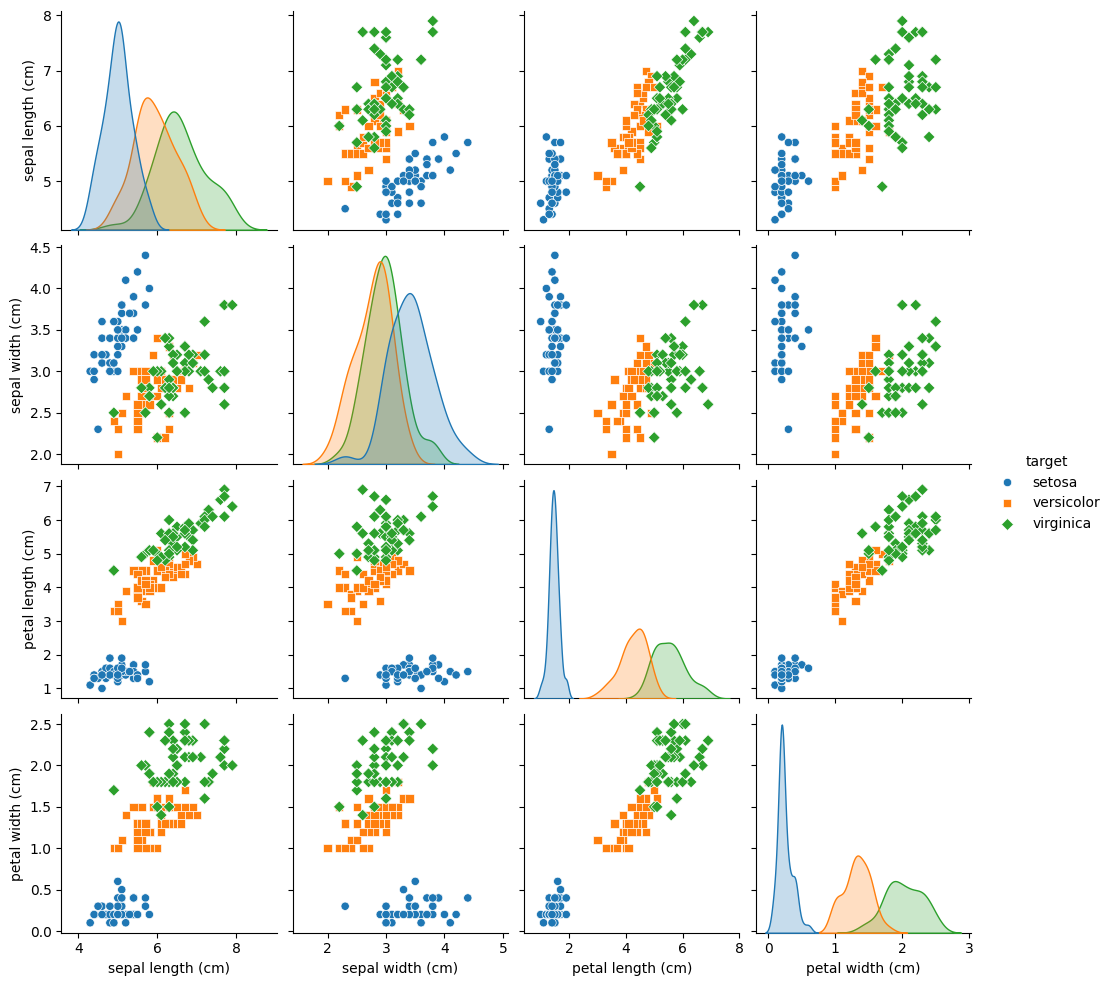

target
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [ ]:
# Eksplorasi Data
# Menampilkan ringkasan statistik data
data.describe()

# Visualisasi distribusi setiap fitur
sns.pairplot(data, hue='target', markers=['o', 's', 'D'])
plt.show()

# Cek jumlah sampel per kelas
print(data['target'].value_counts())

In [ ]:
# Load dataset ulang untuk memastikan 'data' ada
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target

data['target'] = data['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Pastikan data tersedia
print(data.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [ ]:
# 3. Data Preparation
# Memisahkan fitur dan target
from sklearn.preprocessing import StandardScaler # Tambahkan import ini
X = data.drop(columns=['target'])
y = data['target']

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Menampilkan bentuk data setelah preprocessing
print("Shape of training data:", X_train.shape)
print("Shape of testing data:", X_test.shape)

Shape of training data: (120, 4)
Shape of testing data: (30, 4)


In [ ]:
# 4. Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Menggunakan Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test)


In [ ]:
# 5. Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [ ]:
# 6. Deployment
import joblib
# Menyimpan model yang telah dilatih
joblib.dump(model, 'iris_model.pkl')
print("Model telah disimpan sebagai 'iris_model.pkl'")


Model telah disimpan sebagai 'iris_model.pkl'
